<a href="https://colab.research.google.com/github/ssubin29/KaggleStruggle/blob/main/digitRecognizer_useSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle API 연동

In [ ]:
# API Token 다운받기
# 다운받은 API Token 업로드 하기
!pip install kaggle
from google.colab import files
files.upload()
# json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

Saving kaggle.json to kaggle.json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 필요한 모듈 임포트 & 데이터 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [ ]:
DATA_IN = '/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/'
import os
for dirname, _, filenames in os.walk(DATA_IN):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/train.csv
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/test.csv
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/sample_submission.csv
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/test.csv.zip
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/train.csv.zip


In [ ]:
labeled_images = pd.read_csv(DATA_IN+'train.csv')
images = labeled_images.iloc[:,1:]
labels = labeled_images.iloc[:,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

In [ ]:
print(labeled_images.head)

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0       

## train.csv의 이미지 확인

Text(0.5, 1.0, '8')

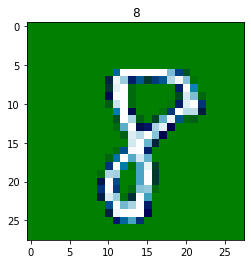

In [ ]:
i=10
img=train_images.iloc[i].values
img=img.reshape((28,28)) #784bit(28x28)의 픽셀이니까
plt.imshow(img,cmap='ocean')
plt.title(train_labels.iloc[i,0])

(array([661.,   9.,   9.,   6.,  12.,   8.,   5.,   9.,  16.,  49.]),
 array([  0. ,  25.4,  50.8,  76.2, 101.6, 127. , 152.4, 177.8, 203.2,
        228.6, 254. ]),
 <a list of 10 Patch objects>)

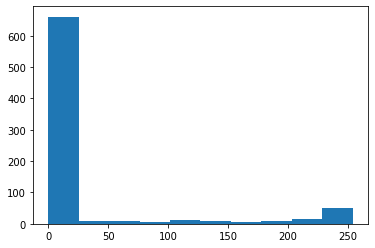

In [ ]:
plt.hist(train_images.iloc[i])

## 모델 만들기 - svm 분류 모델

In [ ]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.9747619047619047

## test.csv로 모델 평가

In [ ]:
test_data=pd.read_csv(DATA_IN+'/test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data)

In [ ]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)

In [ ]:
!kaggle competitions submit -c digit-recognizer -f results.csv -m "Message"

100% 208k/208k [00:00<00:00, 985kB/s]
Successfully submitted to Digit Recognizer